In [1]:
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt

In [2]:
def GenerateSampleNetwork():
    network = nx.Graph()
    f=open("network.txt","r")
    lines=f.readlines()
    for l in lines:
        u,v=l.split()
        network.add_edge(u,v)
    print(network.number_of_edges())
    f.close()
    return network

In [3]:
def CountActivatedNeighbors(neighbors,activatedNodes):
    i=0
    for ne in neighbors:
        if ne in activatedNodes:
            i+=1
    return i

In [4]:
def spreadNodes(G, seedNode):
    activatedNodes = []
    activatedNodes.append(seedNode)
    foundFlag = True
    while foundFlag:
        foundFlag = False
        for node in G.nodes():
            if  not activatedNodes.__contains__(node):
                neighbors=G.neighbors(node)
                activeNeighbors = CountActivatedNeighbors(neighbors,activatedNodes)
                possibility = 0.0
                cLen=len(list(neighbors))
                if cLen > 0:
                    possibility = activeNeighbors / cLen
                if  possibility>rnd.random() :
                    activatedNodes.append(node)
                    foundFlag = True

    return len(activatedNodes)

In [8]:
def MaximizeInfluence(G, seedCount, l):
    seedNodes = [] 
    sc=1
    while sc<seedCount:
        spread = dict()
        for node in G.nodes():
            if node not in seedNodes:
                s = 0
                k=1
                while k<l:
                    subgraph = nx.DiGraph(G.subgraph(list(seedNodes) + [node]))
                    s += spreadNodes(subgraph, node)
                    k+=1
                spread[node] = s / l            
        seedNodes.append(list(spread.keys())[0])
        sc+=1

    return list(seedNodes)

In [9]:
def Exp(network):
    pos = nx.spring_layout(network)
    nx.draw(network, pos=pos, node_size=100, alpha=0.8)
    ls=dict()
    for node in network.nodes():
        ls[node]=node
    seedNodes = MaximizeInfluence(network, eta=5, l=10)
    nx.draw_networkx_nodes(network, pos=pos, nodelist=seedNodes, node_color='r', node_size=200, alpha=0.8)
    nx.draw_networkx_labels(network, pos=pos, labels=ls, font_size=10)
    plt.show()

    # Print seed nodes
    print(f"Seed nodes: {seedNodes}" )

10


TypeError: MaximizeInfluence() got an unexpected keyword argument 'eta'

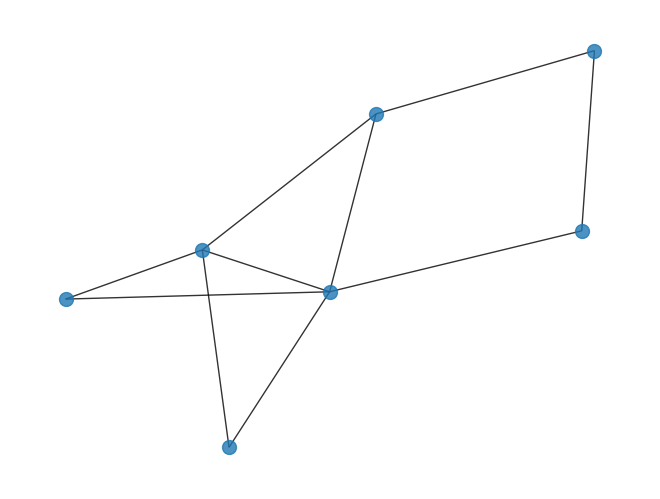

In [10]:
network=GenerateSampleNetwork()
Exp(network)
